## Unsupervised Learning 

## Задача:

• Дадени се податоци во 3D координатен систем кои ги претставуваат локациите на сите земјотреси
регистрирани во рок од една година.

• Податоците се поставени на сферична структура која ја опишува формата на нашата планета.

• Ваша цел е да ги издвоите потенцијалните раседни линии кои опишуваат движење на пукната
пропаганда низ одредена област.
1. Прочитајте ги податоците (earthquakes.ply) со тоа што преку Google ќе најдете информации
како би го направиле тоа.
2. Визуелизирајте ги податоците.
3. Издвојте ги раседните линии со помош на соодветни алгоритми кои ги учевме изминативе
часови.
4. Визуелизирајте ги кластерите (Секој кластер со различна боја).
5. Изгответе мал заклучок зошто баш тој алгоритам го употребивте и каков е квалитетот на
резултатот што сете го добиле.

## Task 1: 

- Прочитајте ги податоците (earthquakes.ply) со тоа што преку Google ќе најдете информации како би го направиле тоа:

In [ ]:
# Install plyfile library in order to read the data file:

#!pip install plyfile

In [1]:
# Initializing libraries:

from plyfile import PlyData, PlyElement
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import ParameterGrid
from sklearn import metrics
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn import preprocessing
%matplotlib notebook

### Read Data:

In [2]:
# Read the data from 'earthquakes.ply' file:

plydata = PlyData.read('earthquakes.ply')

In [3]:
print(plydata)

ply
format ascii 1.0
element vertex 521721
property float x
property float y
property float z
property uchar red
property uchar green
property uchar blue
end_header


### Compose Data:

In [4]:
# Creating working dataset:

x = plydata.elements[0].data['x']
y = plydata.elements[0].data['y']
z = plydata.elements[0].data['z']

x = x[:, np.newaxis]
y = y[:, np.newaxis]
z = z[:, np.newaxis]

data = np.concatenate((x, y, z), axis = -1)

In [5]:
# Checking data shape:

print(data.shape)

(521721, 3)


In [6]:
# Checking data type:

type(data)

numpy.ndarray

In [7]:
# Print data:

print(data)

[[  1.234752  -8.261918  63.452473]
 [  1.378754  -8.239111  63.452473]
 [  1.522337  -8.213793  63.452473]
 ...
 [ 21.979126 -53.987717  20.19655 ]
 [-34.131927  15.771598  45.916992]
 [-30.476435  52.33455  -19.747707]]


In [8]:
# Converting data as numpy.ndarray to dataset as pd.DataFrame:

dataset = pd.DataFrame(data, columns = ['X_coordinate', 'Y_coordinate', 'Z_coordinate'])

In [9]:
# Print dataset:

dataset

,X_coordinate,Y_coordinate,Z_coordinate
0,1.234752,-8.261918,63.452473
1,1.378754,-8.239111,63.452473
2,1.522337,-8.213793,63.452473
3,1.665455,-8.185974,63.452473
4,1.808066,-8.155661,63.452473
...,...,...,...
521716,-24.056047,-45.781185,37.447147
521717,-1.405685,-60.586395,14.881525
521718,21.979126,-53.987717,20.196550
521719,-34.131927,15.771598,45.916992


#### Note: 
- The dataset has 521721 rows which makes it very hard for proccesing, for that reason we are going to make smaller sample
    in order to reduce calculation time and pc power.

In [31]:
# Sampling random sample for faster performance and more convenient handling:

s_dataset = dataset.sample(n = 5000)

In [32]:
# Print the sampled dataset:

s_dataset

,X_coordinate,Y_coordinate,Z_coordinate
272012,25.762457,-54.829956,20.330017
71991,16.736401,-50.308540,-33.071037
386114,-38.871071,31.879665,37.798267
94888,-39.719704,-4.455981,48.710876
201880,-34.754314,-11.770109,51.783543
...,...,...,...
258144,-29.985851,-14.613353,52.939152
152112,-58.006321,19.628414,-11.188336
115761,-24.875319,-42.017220,41.463627
258271,-37.370911,50.481773,4.208118


## Task 2:

- Визуелизирајте ги податоците:

<IPython.core.display.Javascript object>


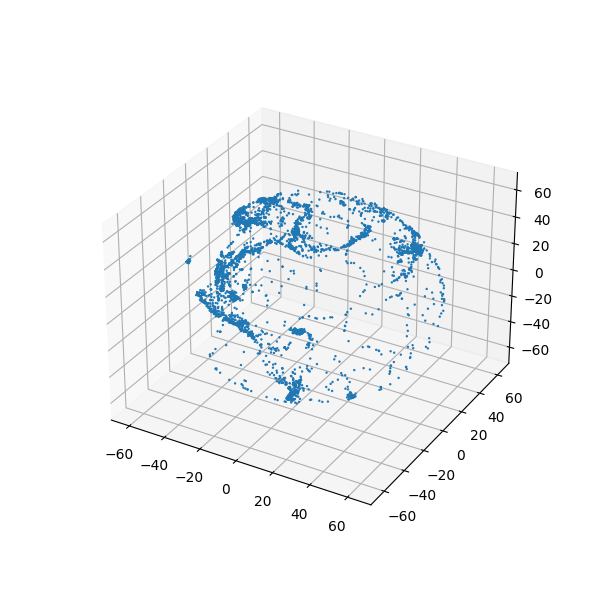

In [34]:
# Visualizing the s_dataset for analyzing density and patterns:

fig = plt.figure(figsize = (6, 6))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(s_dataset['X_coordinate'], s_dataset['Y_coordinate'], s_dataset['Z_coordinate'], alpha = 1, s = 0.5)
plt.show()

## Tasks 3, 4 and 5 applied on All Clustering Algorithms separately:

- Издвојте ги раседните линии со помош на соодветни алгоритми кои ги учевме изминативе часови:
- Визуелизирајте ги кластерите (Секој кластер со различна боја):
- Изгответе мал заклучок зошто баш тој алгоритам го употребивте и каков е квалитетот на резултатот што сете го добиле:

#### Evaluation Function:

In [35]:
# Method that search for the best parameter that retrive the highest silhouette score:

def evaluate(model, parameter_grid, data):
    best_score=-1
    for param in parameter_grid:
        model.set_params(**param)
        model.fit(data)
        if len(np.unique(model.labels_))>1: # ako brojot na klasterite mi e pogolem od 1
            curent_score = metrics.silhouette_score(data, model.labels_) # meram siluette_score na toj model so izbrani parametri
            print("Parameter : ", param, "Score :", curent_score)
            if curent_score>best_score: # ako skorot sto mi ja dava metrikata e pogolem od najdobriot skor
                best_score=curent_score
                best_grid=param
    print(best_grid)
    print(best_score)

## a) KMeans Clustering Algorithm:

### Task 3: KMeans 

- Издвојте ги раседните линии со помош на соодветни алгоритми кои ги учевме изминативе часови:

In [37]:
# KMeans model Hyper Parameter optimization with Parameter Grid:

# KMeans model:
model_km = KMeans(random_state = 0)

# Create the space of hyperparameter values:
n_clusters = range(2, 30)

# Packing the hyperparameter values in variable:
parameters = {'n_clusters' : n_clusters}

# Evaluation procedure:
parameter_grid = ParameterGrid(parameters)
data = s_dataset
evaluate(model_km, parameter_grid, data)

Parameter :  {'n_clusters': 2} Score : 0.34769765
Parameter :  {'n_clusters': 3} Score : 0.40107268
Parameter :  {'n_clusters': 4} Score : 0.49254346
Parameter :  {'n_clusters': 5} Score : 0.49662828
Parameter :  {'n_clusters': 6} Score : 0.4994197
Parameter :  {'n_clusters': 7} Score : 0.51053095
Parameter :  {'n_clusters': 8} Score : 0.5170124
Parameter :  {'n_clusters': 9} Score : 0.52267647
Parameter :  {'n_clusters': 10} Score : 0.55621636
Parameter :  {'n_clusters': 11} Score : 0.57108873
Parameter :  {'n_clusters': 12} Score : 0.5721269
Parameter :  {'n_clusters': 13} Score : 0.58272004
Parameter :  {'n_clusters': 14} Score : 0.5753079
Parameter :  {'n_clusters': 15} Score : 0.5595464
Parameter :  {'n_clusters': 16} Score : 0.5844928
Parameter :  {'n_clusters': 17} Score : 0.58798945
Parameter :  {'n_clusters': 18} Score : 0.5514898
Parameter :  {'n_clusters': 19} Score : 0.5488736
Parameter :  {'n_clusters': 20} Score : 0.56590974
Parameter :  {'n_clusters': 21} Score : 0.55414

<IPython.core.display.Javascript object>


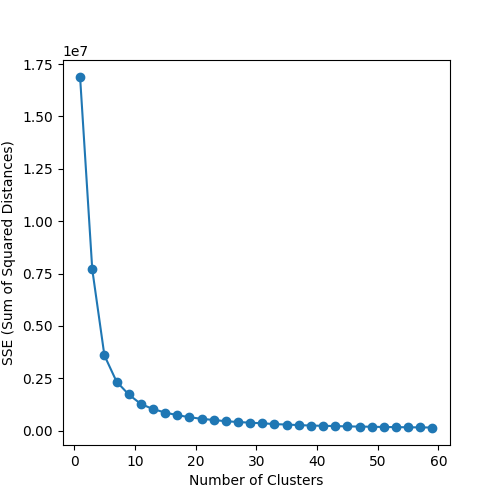

In [38]:
# Introducing the Elbow Method ad the most popular methods to determine the optimal value of k. Let's re-evaluate:

# SSE (Sum of Squared Distances) list:
sse = []

# List of range for k:
list_k = np.arange(1, 60, 2)

# For loop to evaluate the gain of information:
for k in list_k:
    km = KMeans(n_clusters = k, random_state = 0)
    km.fit(s_dataset)
    sse.append(km.inertia_)

# Visualizing the results:
plt.figure(figsize = (5, 5))
plt.plot(list_k, sse, '-o')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE (Sum of Squared Distances)')
plt.show()

In [39]:
# Build KMeans model with the best parameters from the evaluation:

model_km = KMeans(n_clusters = 17)
clustering_km = model_km.fit(s_dataset)
labels_km = clustering_km.labels_

### Task 4: KMeans

- Визуелизирајте ги кластерите (Секој кластер со различна боја):

<IPython.core.display.Javascript object>


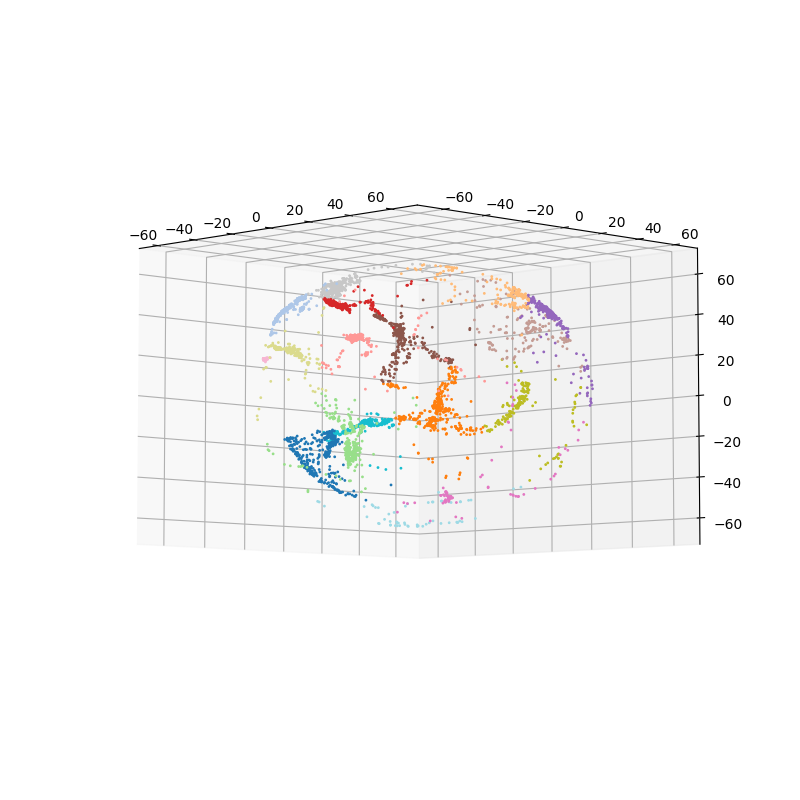

In [41]:
# Visualizing the results from KMeans Clustering:

fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(s_dataset['X_coordinate'], s_dataset['Y_coordinate'], s_dataset['Z_coordinate'], c = labels_km, alpha = 1, s = 1, cmap = 'tab20')
plt.show()

### Note: 

- This is our best clustering algorithm.
- Here we rotated the figure to get better view of the results (to align with the offered solution).

### Task 5: KMeans

- Изгответе мал заклучок зошто баш тој алгоритам го употребивте и каков е квалитетот на резултатот што сете го добиле:

### Summary on KMeans:

1) Make a small conclusion as to why you used that algorithm?

- Our goal is to try all the clustering algorithm that we learn this week in unsupervised learning, thus it is not a decision,
    ruther school approach in solving the task. Having said that, we will start with KMeans Clustering Algorithm.
    
    - Disadvantage side of KMeans in our case:
    The goal of KMeans is to group data points into distinct non-overlapping subgroups, which makes it a very good for jobs 
    when the clusters have a kind of spherical shapes. However, here we are dealing with different density spred of data points
    accros the data space and the data points follow non-convex shapes. Now, this scenario makes KMeans clustering algorithm to 
    perform poorly and give us not so good results, especialy when the data contains outliers.
    The most important limitations of KMeans are: 
        - The user has to specify k (the number of clusters) in the beginning. 
        - KMeans can only handle numerical data. 
        - KMeans assumes that we deal with spherical clusters and that each cluster has roughly equal numbers of observations.
        
    - Advantage side of KMeans in our case:
    The KMeans clustering algorithm is used to find groups which have not been explicitly labeled in the data, such is our case.
    This can be used to confirm assumptions about what types of groups exist or to identify unknown groups in complex data sets,
    which is our goal with this taks. KMeans has very good performance on task execution (it is very fast), it is easy to implement
    and also is low memory consumer. 
    
- Finally, we will use KMeans to get an idea of the structure of the dataset without using to much resources. 
    
2) What is the quality of the result that you got?

- The result that we manage to get on first sight look good. We can see that the lines are clearly defined but not so convenient if
    they are properly colored (clusterd). However, the lack of experience translates in missing necessary intuition to properly 
    evaluate the results. Moreover, the fact that we do not have the original labels we can not perform any cross check evaluation.

## b) Agglomerative Clustering Algorithm:

### Task 3: Agglomerative

- Издвојте ги раседните линии со помош на соодветни алгоритми кои ги учевме изминативе часови:

In [42]:
# Agglomerative model Hyper Parameter optimization with Parameter Grid:

# Agglomerative model: 
model_agg = AgglomerativeClustering()

# Create the space of hyperparameter values:
n_clusters = range(2, 30)
linkage = ['complete', 'average', 'single']
affinity = ['euclidean', 'l1', 'l2', 'manhattan', 'cosine']

# Packing the hyperparameter values in variable:
parameters = {'n_clusters' : n_clusters,
              'linkage' : linkage,
              'affinity' : affinity}     

# Evaluation procedure:
parameter_grid = ParameterGrid(parameters)
data = s_dataset
evaluate(model_agg, parameter_grid, data)

Parameter :  {'affinity': 'euclidean', 'linkage': 'complete', 'n_clusters': 2} Score : 0.17880759
Parameter :  {'affinity': 'euclidean', 'linkage': 'complete', 'n_clusters': 3} Score : 0.2847854
Parameter :  {'affinity': 'euclidean', 'linkage': 'complete', 'n_clusters': 4} Score : 0.33858535
Parameter :  {'affinity': 'euclidean', 'linkage': 'complete', 'n_clusters': 5} Score : 0.2962249
Parameter :  {'affinity': 'euclidean', 'linkage': 'complete', 'n_clusters': 6} Score : 0.22553653
Parameter :  {'affinity': 'euclidean', 'linkage': 'complete', 'n_clusters': 7} Score : 0.26070258
Parameter :  {'affinity': 'euclidean', 'linkage': 'complete', 'n_clusters': 8} Score : 0.39292625
Parameter :  {'affinity': 'euclidean', 'linkage': 'complete', 'n_clusters': 9} Score : 0.3894212
Parameter :  {'affinity': 'euclidean', 'linkage': 'complete', 'n_clusters': 10} Score : 0.39187798
Parameter :  {'affinity': 'euclidean', 'linkage': 'complete', 'n_clusters': 11} Score : 0.43479127
Parameter :  {'affini

Parameter :  {'affinity': 'l1', 'linkage': 'complete', 'n_clusters': 2} Score : 0.3486284
Parameter :  {'affinity': 'l1', 'linkage': 'complete', 'n_clusters': 3} Score : 0.36448765
Parameter :  {'affinity': 'l1', 'linkage': 'complete', 'n_clusters': 4} Score : 0.3654002
Parameter :  {'affinity': 'l1', 'linkage': 'complete', 'n_clusters': 5} Score : 0.3017163
Parameter :  {'affinity': 'l1', 'linkage': 'complete', 'n_clusters': 6} Score : 0.2680102
Parameter :  {'affinity': 'l1', 'linkage': 'complete', 'n_clusters': 7} Score : 0.41165683
Parameter :  {'affinity': 'l1', 'linkage': 'complete', 'n_clusters': 8} Score : 0.40083554
Parameter :  {'affinity': 'l1', 'linkage': 'complete', 'n_clusters': 9} Score : 0.39809543
Parameter :  {'affinity': 'l1', 'linkage': 'complete', 'n_clusters': 10} Score : 0.4284843
Parameter :  {'affinity': 'l1', 'linkage': 'complete', 'n_clusters': 11} Score : 0.42936894
Parameter :  {'affinity': 'l1', 'linkage': 'complete', 'n_clusters': 12} Score : 0.40079093
P

Parameter :  {'affinity': 'l2', 'linkage': 'complete', 'n_clusters': 9} Score : 0.3894212
Parameter :  {'affinity': 'l2', 'linkage': 'complete', 'n_clusters': 10} Score : 0.39187798
Parameter :  {'affinity': 'l2', 'linkage': 'complete', 'n_clusters': 11} Score : 0.43479127
Parameter :  {'affinity': 'l2', 'linkage': 'complete', 'n_clusters': 12} Score : 0.40167496
Parameter :  {'affinity': 'l2', 'linkage': 'complete', 'n_clusters': 13} Score : 0.36437172
Parameter :  {'affinity': 'l2', 'linkage': 'complete', 'n_clusters': 14} Score : 0.3624415
Parameter :  {'affinity': 'l2', 'linkage': 'complete', 'n_clusters': 15} Score : 0.34384838
Parameter :  {'affinity': 'l2', 'linkage': 'complete', 'n_clusters': 16} Score : 0.32765195
Parameter :  {'affinity': 'l2', 'linkage': 'complete', 'n_clusters': 17} Score : 0.3269391
Parameter :  {'affinity': 'l2', 'linkage': 'complete', 'n_clusters': 18} Score : 0.32907936
Parameter :  {'affinity': 'l2', 'linkage': 'complete', 'n_clusters': 19} Score : 0.3

Parameter :  {'affinity': 'manhattan', 'linkage': 'complete', 'n_clusters': 15} Score : 0.47001845
Parameter :  {'affinity': 'manhattan', 'linkage': 'complete', 'n_clusters': 16} Score : 0.4694737
Parameter :  {'affinity': 'manhattan', 'linkage': 'complete', 'n_clusters': 17} Score : 0.46914092
Parameter :  {'affinity': 'manhattan', 'linkage': 'complete', 'n_clusters': 18} Score : 0.46939293
Parameter :  {'affinity': 'manhattan', 'linkage': 'complete', 'n_clusters': 19} Score : 0.47148252
Parameter :  {'affinity': 'manhattan', 'linkage': 'complete', 'n_clusters': 20} Score : 0.46621993
Parameter :  {'affinity': 'manhattan', 'linkage': 'complete', 'n_clusters': 21} Score : 0.47821024
Parameter :  {'affinity': 'manhattan', 'linkage': 'complete', 'n_clusters': 22} Score : 0.48066923
Parameter :  {'affinity': 'manhattan', 'linkage': 'complete', 'n_clusters': 23} Score : 0.48033917
Parameter :  {'affinity': 'manhattan', 'linkage': 'complete', 'n_clusters': 24} Score : 0.52229875
Parameter :

Parameter :  {'affinity': 'cosine', 'linkage': 'complete', 'n_clusters': 16} Score : 0.35406777
Parameter :  {'affinity': 'cosine', 'linkage': 'complete', 'n_clusters': 17} Score : 0.38094848
Parameter :  {'affinity': 'cosine', 'linkage': 'complete', 'n_clusters': 18} Score : 0.38421148
Parameter :  {'affinity': 'cosine', 'linkage': 'complete', 'n_clusters': 19} Score : 0.39165053
Parameter :  {'affinity': 'cosine', 'linkage': 'complete', 'n_clusters': 20} Score : 0.39351064
Parameter :  {'affinity': 'cosine', 'linkage': 'complete', 'n_clusters': 21} Score : 0.39471862
Parameter :  {'affinity': 'cosine', 'linkage': 'complete', 'n_clusters': 22} Score : 0.39638445
Parameter :  {'affinity': 'cosine', 'linkage': 'complete', 'n_clusters': 23} Score : 0.4029645
Parameter :  {'affinity': 'cosine', 'linkage': 'complete', 'n_clusters': 24} Score : 0.40213037
Parameter :  {'affinity': 'cosine', 'linkage': 'complete', 'n_clusters': 25} Score : 0.3969347
Parameter :  {'affinity': 'cosine', 'linka

In [43]:
# Agglomerative model Hyper Parameter optimization with Parameter Grid: 'ward'

# Agglomerative model: 
model_agg2 = AgglomerativeClustering()

# Create the space of hyperparameter values:
n_clusters = range(2, 30)
linkage = ['ward']
affinity = ['euclidean']

# Packing the hyperparameter values in variable:
parameters = {'n_clusters' : n_clusters,
              'linkage' : linkage,
              'affinity' : affinity}     

# Evaluation procedure:
parameter_grid = ParameterGrid(parameters)
data = s_dataset
evaluate(model_agg2, parameter_grid, data)

Parameter :  {'affinity': 'euclidean', 'linkage': 'ward', 'n_clusters': 2} Score : 0.34745318
Parameter :  {'affinity': 'euclidean', 'linkage': 'ward', 'n_clusters': 3} Score : 0.38885424
Parameter :  {'affinity': 'euclidean', 'linkage': 'ward', 'n_clusters': 4} Score : 0.3881771
Parameter :  {'affinity': 'euclidean', 'linkage': 'ward', 'n_clusters': 5} Score : 0.4357788
Parameter :  {'affinity': 'euclidean', 'linkage': 'ward', 'n_clusters': 6} Score : 0.47077587
Parameter :  {'affinity': 'euclidean', 'linkage': 'ward', 'n_clusters': 7} Score : 0.48229444
Parameter :  {'affinity': 'euclidean', 'linkage': 'ward', 'n_clusters': 8} Score : 0.49063614
Parameter :  {'affinity': 'euclidean', 'linkage': 'ward', 'n_clusters': 9} Score : 0.49529982
Parameter :  {'affinity': 'euclidean', 'linkage': 'ward', 'n_clusters': 10} Score : 0.5104287
Parameter :  {'affinity': 'euclidean', 'linkage': 'ward', 'n_clusters': 11} Score : 0.5434073
Parameter :  {'affinity': 'euclidean', 'linkage': 'ward', 'n_c

In [44]:
# Build Agglomerative model with the best parameters from the evaluation:

model_agg = AgglomerativeClustering(n_clusters = 20, linkage = 'average', affinity = 'cosine')
clustering_agg = model_agg.fit(s_dataset)
labels_agg = clustering_agg.labels_

### Task 4: Agglomerative

- Визуелизирајте ги кластерите (Секој кластер со различна боја):

<IPython.core.display.Javascript object>


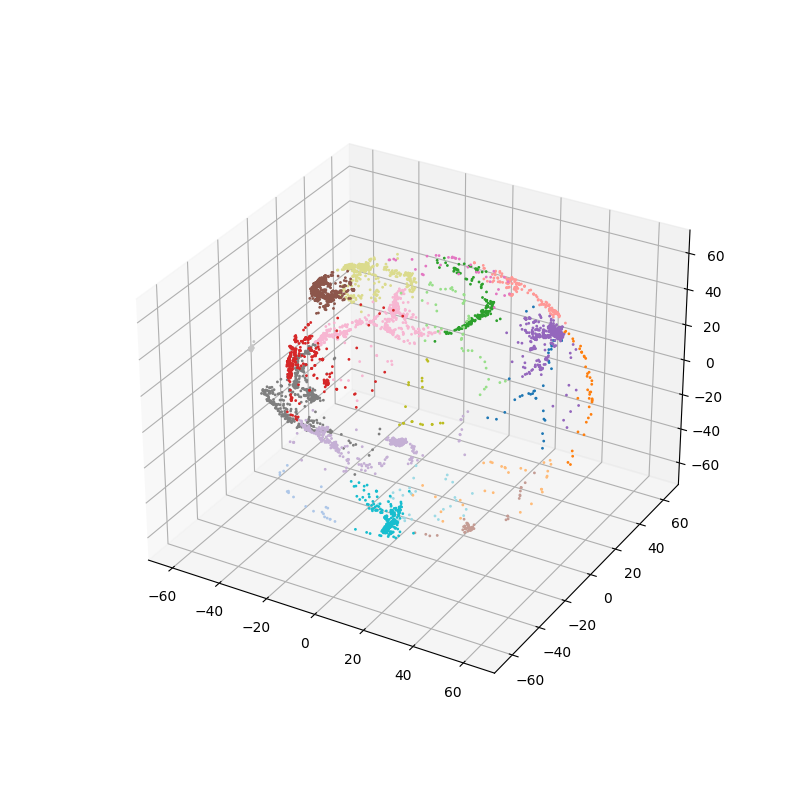

In [46]:
# Visualizing the results from Agglomerative Clustering:

fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(s_dataset['X_coordinate'], s_dataset['Y_coordinate'], s_dataset['Z_coordinate'], c = labels_agg, alpha = 1, s = 1, cmap = 'tab20')
plt.show()

### Task 5: Agglomerative

- Изгответе мал заклучок зошто баш тој алгоритам го употребивте и каков е квалитетот на резултатот што сете го добиле:

### Summary on Agglomerative:

1) Make a small conclusion as to why you used that algorithm?

- The second clustering algorithm that we will implement is Agglomerative Clustering Algorithm. The Agglomerative Clustering
    performs a hierarchical clustering using a bottom up approach, each observation starts in its own cluster, and clusters are
    successively merged together. The linkage criteria determines the metric used for the merge strategy.
    
    - Disadvantage side of Agglomerative in our case:
        One drawback is that groups with close pairs can merge sooner than is optimal, even if those groups have overall dissimilarity.
        This methods is sensitive to outliers in a manner that can cause less-than-optimal merging.
    
    - Advantage side of KMeans in our case:
        This algorithm is not sensitive to the choice of distance metric.
        
- Finally, we will use Agglomerative clustering to group objects in clusters based on their similarity.
    
2) What is the quality of the result that you got?

- Here the result that we manage to get are slightly lower than the first algorithm. But, once again we can not firmly confirm   the clustering results. 

## c) DB-Scan Clustering Algorithm:

### Task 3: DB-Scan

- Издвојте ги раседните линии со помош на соодветни алгоритми кои ги учевме изминативе часови:

In [49]:
# DB-Scan model Hyper Parameter optimization with Parameter Grid:

# Agglomerative model: 
model_db = DBSCAN()

# Create the space of hyperparameter values:
eps = [4, 4.5, 5, 5.2, 5.8, 6, 6.5, 7, 7.2, 7.5, 8, 8.5, 9, 9.2, 9.8, 10]
min_samples = range(10, 60)
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']

# Packing the hyperparameter values in variable:
parameters = {'eps' : eps,
              'min_samples' : min_samples,
              'algorithm' : algorithm}     

# Evaluation procedure:
parameter_grid = ParameterGrid(parameters)
data = s_dataset
evaluate(model_db, parameter_grid, data)

Parameter :  {'algorithm': 'auto', 'eps': 4, 'min_samples': 10} Score : 0.15141033
Parameter :  {'algorithm': 'auto', 'eps': 4, 'min_samples': 11} Score : 0.32473406
Parameter :  {'algorithm': 'auto', 'eps': 4, 'min_samples': 12} Score : 0.31363398
Parameter :  {'algorithm': 'auto', 'eps': 4, 'min_samples': 13} Score : 0.30613148
Parameter :  {'algorithm': 'auto', 'eps': 4, 'min_samples': 14} Score : 0.28431368
Parameter :  {'algorithm': 'auto', 'eps': 4, 'min_samples': 15} Score : 0.284099
Parameter :  {'algorithm': 'auto', 'eps': 4, 'min_samples': 16} Score : 0.28081182
Parameter :  {'algorithm': 'auto', 'eps': 4, 'min_samples': 17} Score : 0.33473936
Parameter :  {'algorithm': 'auto', 'eps': 4, 'min_samples': 18} Score : 0.3324556
Parameter :  {'algorithm': 'auto', 'eps': 4, 'min_samples': 19} Score : 0.33580402
Parameter :  {'algorithm': 'auto', 'eps': 4, 'min_samples': 20} Score : 0.33491036
Parameter :  {'algorithm': 'auto', 'eps': 4, 'min_samples': 21} Score : 0.33503884
Paramet

Parameter :  {'algorithm': 'auto', 'eps': 4.5, 'min_samples': 58} Score : 0.23588936
Parameter :  {'algorithm': 'auto', 'eps': 4.5, 'min_samples': 59} Score : 0.22999604
Parameter :  {'algorithm': 'auto', 'eps': 5, 'min_samples': 10} Score : 0.19447552
Parameter :  {'algorithm': 'auto', 'eps': 5, 'min_samples': 11} Score : 0.18509725
Parameter :  {'algorithm': 'auto', 'eps': 5, 'min_samples': 12} Score : 0.13694766
Parameter :  {'algorithm': 'auto', 'eps': 5, 'min_samples': 13} Score : 0.13220967
Parameter :  {'algorithm': 'auto', 'eps': 5, 'min_samples': 14} Score : 0.17723489
Parameter :  {'algorithm': 'auto', 'eps': 5, 'min_samples': 15} Score : 0.17574733
Parameter :  {'algorithm': 'auto', 'eps': 5, 'min_samples': 16} Score : 0.22576888
Parameter :  {'algorithm': 'auto', 'eps': 5, 'min_samples': 17} Score : 0.38659784
Parameter :  {'algorithm': 'auto', 'eps': 5, 'min_samples': 18} Score : 0.29990253
Parameter :  {'algorithm': 'auto', 'eps': 5, 'min_samples': 19} Score : 0.33166313


Parameter :  {'algorithm': 'auto', 'eps': 5.2, 'min_samples': 56} Score : 0.39525348
Parameter :  {'algorithm': 'auto', 'eps': 5.2, 'min_samples': 57} Score : 0.38365474
Parameter :  {'algorithm': 'auto', 'eps': 5.2, 'min_samples': 58} Score : 0.38075063
Parameter :  {'algorithm': 'auto', 'eps': 5.2, 'min_samples': 59} Score : 0.38366094
Parameter :  {'algorithm': 'auto', 'eps': 5.8, 'min_samples': 10} Score : 0.25600207
Parameter :  {'algorithm': 'auto', 'eps': 5.8, 'min_samples': 11} Score : 0.2540824
Parameter :  {'algorithm': 'auto', 'eps': 5.8, 'min_samples': 12} Score : 0.20362449
Parameter :  {'algorithm': 'auto', 'eps': 5.8, 'min_samples': 13} Score : 0.20264319
Parameter :  {'algorithm': 'auto', 'eps': 5.8, 'min_samples': 14} Score : 0.2072734
Parameter :  {'algorithm': 'auto', 'eps': 5.8, 'min_samples': 15} Score : 0.21038282
Parameter :  {'algorithm': 'auto', 'eps': 5.8, 'min_samples': 16} Score : 0.20779434
Parameter :  {'algorithm': 'auto', 'eps': 5.8, 'min_samples': 17} S

Parameter :  {'algorithm': 'auto', 'eps': 6, 'min_samples': 54} Score : 0.43376353
Parameter :  {'algorithm': 'auto', 'eps': 6, 'min_samples': 55} Score : 0.4336437
Parameter :  {'algorithm': 'auto', 'eps': 6, 'min_samples': 56} Score : 0.4328354
Parameter :  {'algorithm': 'auto', 'eps': 6, 'min_samples': 57} Score : 0.43112168
Parameter :  {'algorithm': 'auto', 'eps': 6, 'min_samples': 58} Score : 0.42829844
Parameter :  {'algorithm': 'auto', 'eps': 6, 'min_samples': 59} Score : 0.44034645
Parameter :  {'algorithm': 'auto', 'eps': 6.5, 'min_samples': 10} Score : -0.11195448
Parameter :  {'algorithm': 'auto', 'eps': 6.5, 'min_samples': 11} Score : -0.032067467
Parameter :  {'algorithm': 'auto', 'eps': 6.5, 'min_samples': 12} Score : -0.032236066
Parameter :  {'algorithm': 'auto', 'eps': 6.5, 'min_samples': 13} Score : 0.010458464
Parameter :  {'algorithm': 'auto', 'eps': 6.5, 'min_samples': 14} Score : 0.08143765
Parameter :  {'algorithm': 'auto', 'eps': 6.5, 'min_samples': 15} Score :

Parameter :  {'algorithm': 'auto', 'eps': 7, 'min_samples': 52} Score : 0.45500654
Parameter :  {'algorithm': 'auto', 'eps': 7, 'min_samples': 53} Score : 0.44559267
Parameter :  {'algorithm': 'auto', 'eps': 7, 'min_samples': 54} Score : 0.42396387
Parameter :  {'algorithm': 'auto', 'eps': 7, 'min_samples': 55} Score : 0.43753687
Parameter :  {'algorithm': 'auto', 'eps': 7, 'min_samples': 56} Score : 0.43674335
Parameter :  {'algorithm': 'auto', 'eps': 7, 'min_samples': 57} Score : 0.43520692
Parameter :  {'algorithm': 'auto', 'eps': 7, 'min_samples': 58} Score : 0.43490052
Parameter :  {'algorithm': 'auto', 'eps': 7, 'min_samples': 59} Score : 0.43312275
Parameter :  {'algorithm': 'auto', 'eps': 7.2, 'min_samples': 10} Score : -0.26812017
Parameter :  {'algorithm': 'auto', 'eps': 7.2, 'min_samples': 11} Score : -0.13500561
Parameter :  {'algorithm': 'auto', 'eps': 7.2, 'min_samples': 12} Score : -0.12735027
Parameter :  {'algorithm': 'auto', 'eps': 7.2, 'min_samples': 13} Score : -0.1

Parameter :  {'algorithm': 'auto', 'eps': 7.5, 'min_samples': 49} Score : 0.42256993
Parameter :  {'algorithm': 'auto', 'eps': 7.5, 'min_samples': 50} Score : 0.42256993
Parameter :  {'algorithm': 'auto', 'eps': 7.5, 'min_samples': 51} Score : 0.42177632
Parameter :  {'algorithm': 'auto', 'eps': 7.5, 'min_samples': 52} Score : 0.42177632
Parameter :  {'algorithm': 'auto', 'eps': 7.5, 'min_samples': 53} Score : 0.42145878
Parameter :  {'algorithm': 'auto', 'eps': 7.5, 'min_samples': 54} Score : 0.4200915
Parameter :  {'algorithm': 'auto', 'eps': 7.5, 'min_samples': 55} Score : 0.4200915
Parameter :  {'algorithm': 'auto', 'eps': 7.5, 'min_samples': 56} Score : 0.41820303
Parameter :  {'algorithm': 'auto', 'eps': 7.5, 'min_samples': 57} Score : 0.4107836
Parameter :  {'algorithm': 'auto', 'eps': 7.5, 'min_samples': 58} Score : 0.41053852
Parameter :  {'algorithm': 'auto', 'eps': 7.5, 'min_samples': 59} Score : 0.40924606
Parameter :  {'algorithm': 'auto', 'eps': 8, 'min_samples': 10} Scor

Parameter :  {'algorithm': 'auto', 'eps': 8.5, 'min_samples': 47} Score : 0.09722072
Parameter :  {'algorithm': 'auto', 'eps': 8.5, 'min_samples': 48} Score : 0.09733659
Parameter :  {'algorithm': 'auto', 'eps': 8.5, 'min_samples': 49} Score : 0.0285467
Parameter :  {'algorithm': 'auto', 'eps': 8.5, 'min_samples': 50} Score : 0.094067246
Parameter :  {'algorithm': 'auto', 'eps': 8.5, 'min_samples': 51} Score : 0.09430354
Parameter :  {'algorithm': 'auto', 'eps': 8.5, 'min_samples': 52} Score : 0.09437188
Parameter :  {'algorithm': 'auto', 'eps': 8.5, 'min_samples': 53} Score : 0.09433057
Parameter :  {'algorithm': 'auto', 'eps': 8.5, 'min_samples': 54} Score : 0.094764955
Parameter :  {'algorithm': 'auto', 'eps': 8.5, 'min_samples': 55} Score : 0.21990986
Parameter :  {'algorithm': 'auto', 'eps': 8.5, 'min_samples': 56} Score : 0.412217
Parameter :  {'algorithm': 'auto', 'eps': 8.5, 'min_samples': 57} Score : 0.4121089
Parameter :  {'algorithm': 'auto', 'eps': 8.5, 'min_samples': 58} S

Parameter :  {'algorithm': 'auto', 'eps': 9.2, 'min_samples': 44} Score : 0.048915777
Parameter :  {'algorithm': 'auto', 'eps': 9.2, 'min_samples': 45} Score : 0.04879372
Parameter :  {'algorithm': 'auto', 'eps': 9.2, 'min_samples': 46} Score : 0.05917572
Parameter :  {'algorithm': 'auto', 'eps': 9.2, 'min_samples': 47} Score : 0.05917572
Parameter :  {'algorithm': 'auto', 'eps': 9.2, 'min_samples': 48} Score : 0.058686133
Parameter :  {'algorithm': 'auto', 'eps': 9.2, 'min_samples': 49} Score : 0.05939032
Parameter :  {'algorithm': 'auto', 'eps': 9.2, 'min_samples': 50} Score : 0.05931637
Parameter :  {'algorithm': 'auto', 'eps': 9.2, 'min_samples': 51} Score : 0.0587646
Parameter :  {'algorithm': 'auto', 'eps': 9.2, 'min_samples': 52} Score : 0.099546894
Parameter :  {'algorithm': 'auto', 'eps': 9.2, 'min_samples': 53} Score : 0.09951316
Parameter :  {'algorithm': 'auto', 'eps': 9.2, 'min_samples': 54} Score : 0.099134535
Parameter :  {'algorithm': 'auto', 'eps': 9.2, 'min_samples': 

Parameter :  {'algorithm': 'auto', 'eps': 10, 'min_samples': 40} Score : 0.035526335
Parameter :  {'algorithm': 'auto', 'eps': 10, 'min_samples': 41} Score : 0.039901674
Parameter :  {'algorithm': 'auto', 'eps': 10, 'min_samples': 42} Score : 0.039901674
Parameter :  {'algorithm': 'auto', 'eps': 10, 'min_samples': 43} Score : 0.03999186
Parameter :  {'algorithm': 'auto', 'eps': 10, 'min_samples': 44} Score : -0.011472334
Parameter :  {'algorithm': 'auto', 'eps': 10, 'min_samples': 45} Score : -0.010621777
Parameter :  {'algorithm': 'auto', 'eps': 10, 'min_samples': 46} Score : -0.010821327
Parameter :  {'algorithm': 'auto', 'eps': 10, 'min_samples': 47} Score : -0.01118873
Parameter :  {'algorithm': 'auto', 'eps': 10, 'min_samples': 48} Score : -0.021865027
Parameter :  {'algorithm': 'auto', 'eps': 10, 'min_samples': 49} Score : -0.02172763
Parameter :  {'algorithm': 'auto', 'eps': 10, 'min_samples': 50} Score : -0.016711619
Parameter :  {'algorithm': 'auto', 'eps': 10, 'min_samples': 

Parameter :  {'algorithm': 'ball_tree', 'eps': 4.5, 'min_samples': 34} Score : 0.37933776
Parameter :  {'algorithm': 'ball_tree', 'eps': 4.5, 'min_samples': 35} Score : 0.3780619
Parameter :  {'algorithm': 'ball_tree', 'eps': 4.5, 'min_samples': 36} Score : 0.39325497
Parameter :  {'algorithm': 'ball_tree', 'eps': 4.5, 'min_samples': 37} Score : 0.388476
Parameter :  {'algorithm': 'ball_tree', 'eps': 4.5, 'min_samples': 38} Score : 0.397136
Parameter :  {'algorithm': 'ball_tree', 'eps': 4.5, 'min_samples': 39} Score : 0.3907166
Parameter :  {'algorithm': 'ball_tree', 'eps': 4.5, 'min_samples': 40} Score : 0.37682548
Parameter :  {'algorithm': 'ball_tree', 'eps': 4.5, 'min_samples': 41} Score : 0.37786132
Parameter :  {'algorithm': 'ball_tree', 'eps': 4.5, 'min_samples': 42} Score : 0.3632157
Parameter :  {'algorithm': 'ball_tree', 'eps': 4.5, 'min_samples': 43} Score : 0.37358525
Parameter :  {'algorithm': 'ball_tree', 'eps': 4.5, 'min_samples': 44} Score : 0.3690193
Parameter :  {'alg

Parameter :  {'algorithm': 'ball_tree', 'eps': 5.2, 'min_samples': 27} Score : 0.33906385
Parameter :  {'algorithm': 'ball_tree', 'eps': 5.2, 'min_samples': 28} Score : 0.4162593
Parameter :  {'algorithm': 'ball_tree', 'eps': 5.2, 'min_samples': 29} Score : 0.41608652
Parameter :  {'algorithm': 'ball_tree', 'eps': 5.2, 'min_samples': 30} Score : 0.41483116
Parameter :  {'algorithm': 'ball_tree', 'eps': 5.2, 'min_samples': 31} Score : 0.39587995
Parameter :  {'algorithm': 'ball_tree', 'eps': 5.2, 'min_samples': 32} Score : 0.39579463
Parameter :  {'algorithm': 'ball_tree', 'eps': 5.2, 'min_samples': 33} Score : 0.39526626
Parameter :  {'algorithm': 'ball_tree', 'eps': 5.2, 'min_samples': 34} Score : 0.382623
Parameter :  {'algorithm': 'ball_tree', 'eps': 5.2, 'min_samples': 35} Score : 0.3823102
Parameter :  {'algorithm': 'ball_tree', 'eps': 5.2, 'min_samples': 36} Score : 0.3957693
Parameter :  {'algorithm': 'ball_tree', 'eps': 5.2, 'min_samples': 37} Score : 0.39597043
Parameter :  {'

Parameter :  {'algorithm': 'ball_tree', 'eps': 6, 'min_samples': 19} Score : 0.20764677
Parameter :  {'algorithm': 'ball_tree', 'eps': 6, 'min_samples': 20} Score : 0.38369232
Parameter :  {'algorithm': 'ball_tree', 'eps': 6, 'min_samples': 21} Score : 0.4201247
Parameter :  {'algorithm': 'ball_tree', 'eps': 6, 'min_samples': 22} Score : 0.4116665
Parameter :  {'algorithm': 'ball_tree', 'eps': 6, 'min_samples': 23} Score : 0.41093937
Parameter :  {'algorithm': 'ball_tree', 'eps': 6, 'min_samples': 24} Score : 0.4107708
Parameter :  {'algorithm': 'ball_tree', 'eps': 6, 'min_samples': 25} Score : 0.40883195
Parameter :  {'algorithm': 'ball_tree', 'eps': 6, 'min_samples': 26} Score : 0.35493422
Parameter :  {'algorithm': 'ball_tree', 'eps': 6, 'min_samples': 27} Score : 0.3550467
Parameter :  {'algorithm': 'ball_tree', 'eps': 6, 'min_samples': 28} Score : 0.35505548
Parameter :  {'algorithm': 'ball_tree', 'eps': 6, 'min_samples': 29} Score : 0.3505604
Parameter :  {'algorithm': 'ball_tree

Parameter :  {'algorithm': 'ball_tree', 'eps': 7, 'min_samples': 12} Score : -0.127845
Parameter :  {'algorithm': 'ball_tree', 'eps': 7, 'min_samples': 13} Score : -0.1279717
Parameter :  {'algorithm': 'ball_tree', 'eps': 7, 'min_samples': 14} Score : -0.1279717
Parameter :  {'algorithm': 'ball_tree', 'eps': 7, 'min_samples': 15} Score : 0.12027771
Parameter :  {'algorithm': 'ball_tree', 'eps': 7, 'min_samples': 16} Score : 0.016800616
Parameter :  {'algorithm': 'ball_tree', 'eps': 7, 'min_samples': 17} Score : 0.041210596
Parameter :  {'algorithm': 'ball_tree', 'eps': 7, 'min_samples': 18} Score : 0.05383213
Parameter :  {'algorithm': 'ball_tree', 'eps': 7, 'min_samples': 19} Score : 0.046653274
Parameter :  {'algorithm': 'ball_tree', 'eps': 7, 'min_samples': 20} Score : 0.044604756
Parameter :  {'algorithm': 'ball_tree', 'eps': 7, 'min_samples': 21} Score : 0.10117689
Parameter :  {'algorithm': 'ball_tree', 'eps': 7, 'min_samples': 22} Score : 0.10073927
Parameter :  {'algorithm': 'b

Parameter :  {'algorithm': 'ball_tree', 'eps': 7.2, 'min_samples': 55} Score : 0.42506754
Parameter :  {'algorithm': 'ball_tree', 'eps': 7.2, 'min_samples': 56} Score : 0.42475262
Parameter :  {'algorithm': 'ball_tree', 'eps': 7.2, 'min_samples': 57} Score : 0.43883017
Parameter :  {'algorithm': 'ball_tree', 'eps': 7.2, 'min_samples': 58} Score : 0.43726483
Parameter :  {'algorithm': 'ball_tree', 'eps': 7.2, 'min_samples': 59} Score : 0.4368293
Parameter :  {'algorithm': 'ball_tree', 'eps': 7.5, 'min_samples': 10} Score : -0.31571522
Parameter :  {'algorithm': 'ball_tree', 'eps': 7.5, 'min_samples': 11} Score : -0.13485937
Parameter :  {'algorithm': 'ball_tree', 'eps': 7.5, 'min_samples': 12} Score : -0.13480058
Parameter :  {'algorithm': 'ball_tree', 'eps': 7.5, 'min_samples': 13} Score : -0.12649909
Parameter :  {'algorithm': 'ball_tree', 'eps': 7.5, 'min_samples': 14} Score : -0.12664431
Parameter :  {'algorithm': 'ball_tree', 'eps': 7.5, 'min_samples': 15} Score : -0.12707004
Param

Parameter :  {'algorithm': 'ball_tree', 'eps': 8, 'min_samples': 47} Score : 0.40984643
Parameter :  {'algorithm': 'ball_tree', 'eps': 8, 'min_samples': 48} Score : 0.40984643
Parameter :  {'algorithm': 'ball_tree', 'eps': 8, 'min_samples': 49} Score : 0.42788213
Parameter :  {'algorithm': 'ball_tree', 'eps': 8, 'min_samples': 50} Score : 0.42765996
Parameter :  {'algorithm': 'ball_tree', 'eps': 8, 'min_samples': 51} Score : 0.42684874
Parameter :  {'algorithm': 'ball_tree', 'eps': 8, 'min_samples': 52} Score : 0.42664865
Parameter :  {'algorithm': 'ball_tree', 'eps': 8, 'min_samples': 53} Score : 0.4259662
Parameter :  {'algorithm': 'ball_tree', 'eps': 8, 'min_samples': 54} Score : 0.42579395
Parameter :  {'algorithm': 'ball_tree', 'eps': 8, 'min_samples': 55} Score : 0.4241041
Parameter :  {'algorithm': 'ball_tree', 'eps': 8, 'min_samples': 56} Score : 0.4237789
Parameter :  {'algorithm': 'ball_tree', 'eps': 8, 'min_samples': 57} Score : 0.42365342
Parameter :  {'algorithm': 'ball_tr

Parameter :  {'algorithm': 'ball_tree', 'eps': 9, 'min_samples': 39} Score : -0.014718209
Parameter :  {'algorithm': 'ball_tree', 'eps': 9, 'min_samples': 40} Score : 0.06124443
Parameter :  {'algorithm': 'ball_tree', 'eps': 9, 'min_samples': 41} Score : 0.057851624
Parameter :  {'algorithm': 'ball_tree', 'eps': 9, 'min_samples': 42} Score : 0.04965422
Parameter :  {'algorithm': 'ball_tree', 'eps': 9, 'min_samples': 43} Score : 0.04932734
Parameter :  {'algorithm': 'ball_tree', 'eps': 9, 'min_samples': 44} Score : 0.10038793
Parameter :  {'algorithm': 'ball_tree', 'eps': 9, 'min_samples': 45} Score : 0.09964136
Parameter :  {'algorithm': 'ball_tree', 'eps': 9, 'min_samples': 46} Score : 0.09952895
Parameter :  {'algorithm': 'ball_tree', 'eps': 9, 'min_samples': 47} Score : 0.099726096
Parameter :  {'algorithm': 'ball_tree', 'eps': 9, 'min_samples': 48} Score : 0.10033232
Parameter :  {'algorithm': 'ball_tree', 'eps': 9, 'min_samples': 49} Score : 0.09964338
Parameter :  {'algorithm': '

Parameter :  {'algorithm': 'ball_tree', 'eps': 9.8, 'min_samples': 30} Score : 0.035404053
Parameter :  {'algorithm': 'ball_tree', 'eps': 9.8, 'min_samples': 31} Score : 0.035535272
Parameter :  {'algorithm': 'ball_tree', 'eps': 9.8, 'min_samples': 32} Score : -0.06466379
Parameter :  {'algorithm': 'ball_tree', 'eps': 9.8, 'min_samples': 33} Score : -0.06466379
Parameter :  {'algorithm': 'ball_tree', 'eps': 9.8, 'min_samples': 34} Score : -0.06676713
Parameter :  {'algorithm': 'ball_tree', 'eps': 9.8, 'min_samples': 35} Score : -0.06676713
Parameter :  {'algorithm': 'ball_tree', 'eps': 9.8, 'min_samples': 36} Score : -0.015305648
Parameter :  {'algorithm': 'ball_tree', 'eps': 9.8, 'min_samples': 37} Score : -0.015388178
Parameter :  {'algorithm': 'ball_tree', 'eps': 9.8, 'min_samples': 38} Score : -0.0150653245
Parameter :  {'algorithm': 'ball_tree', 'eps': 9.8, 'min_samples': 39} Score : -0.0150846485
Parameter :  {'algorithm': 'ball_tree', 'eps': 9.8, 'min_samples': 40} Score : -0.01

Parameter :  {'algorithm': 'kd_tree', 'eps': 4, 'min_samples': 21} Score : 0.33503884
Parameter :  {'algorithm': 'kd_tree', 'eps': 4, 'min_samples': 22} Score : 0.32720974
Parameter :  {'algorithm': 'kd_tree', 'eps': 4, 'min_samples': 23} Score : 0.32628456
Parameter :  {'algorithm': 'kd_tree', 'eps': 4, 'min_samples': 24} Score : 0.3723125
Parameter :  {'algorithm': 'kd_tree', 'eps': 4, 'min_samples': 25} Score : 0.37038314
Parameter :  {'algorithm': 'kd_tree', 'eps': 4, 'min_samples': 26} Score : 0.36531696
Parameter :  {'algorithm': 'kd_tree', 'eps': 4, 'min_samples': 27} Score : 0.36346534
Parameter :  {'algorithm': 'kd_tree', 'eps': 4, 'min_samples': 28} Score : 0.3627567
Parameter :  {'algorithm': 'kd_tree', 'eps': 4, 'min_samples': 29} Score : 0.35698462
Parameter :  {'algorithm': 'kd_tree', 'eps': 4, 'min_samples': 30} Score : 0.3925925
Parameter :  {'algorithm': 'kd_tree', 'eps': 4, 'min_samples': 31} Score : 0.3908414
Parameter :  {'algorithm': 'kd_tree', 'eps': 4, 'min_sampl

Parameter :  {'algorithm': 'kd_tree', 'eps': 5, 'min_samples': 16} Score : 0.22576888
Parameter :  {'algorithm': 'kd_tree', 'eps': 5, 'min_samples': 17} Score : 0.38659784
Parameter :  {'algorithm': 'kd_tree', 'eps': 5, 'min_samples': 18} Score : 0.29990253
Parameter :  {'algorithm': 'kd_tree', 'eps': 5, 'min_samples': 19} Score : 0.33166313
Parameter :  {'algorithm': 'kd_tree', 'eps': 5, 'min_samples': 20} Score : 0.31426802
Parameter :  {'algorithm': 'kd_tree', 'eps': 5, 'min_samples': 21} Score : 0.31137228
Parameter :  {'algorithm': 'kd_tree', 'eps': 5, 'min_samples': 22} Score : 0.29630065
Parameter :  {'algorithm': 'kd_tree', 'eps': 5, 'min_samples': 23} Score : 0.29597574
Parameter :  {'algorithm': 'kd_tree', 'eps': 5, 'min_samples': 24} Score : 0.29195455
Parameter :  {'algorithm': 'kd_tree', 'eps': 5, 'min_samples': 25} Score : 0.31884533
Parameter :  {'algorithm': 'kd_tree', 'eps': 5, 'min_samples': 26} Score : 0.36175025
Parameter :  {'algorithm': 'kd_tree', 'eps': 5, 'min_s

Parameter :  {'algorithm': 'kd_tree', 'eps': 5.8, 'min_samples': 11} Score : 0.2540824
Parameter :  {'algorithm': 'kd_tree', 'eps': 5.8, 'min_samples': 12} Score : 0.20362449
Parameter :  {'algorithm': 'kd_tree', 'eps': 5.8, 'min_samples': 13} Score : 0.20264319
Parameter :  {'algorithm': 'kd_tree', 'eps': 5.8, 'min_samples': 14} Score : 0.2072734
Parameter :  {'algorithm': 'kd_tree', 'eps': 5.8, 'min_samples': 15} Score : 0.21038282
Parameter :  {'algorithm': 'kd_tree', 'eps': 5.8, 'min_samples': 16} Score : 0.20779434
Parameter :  {'algorithm': 'kd_tree', 'eps': 5.8, 'min_samples': 17} Score : 0.20698118
Parameter :  {'algorithm': 'kd_tree', 'eps': 5.8, 'min_samples': 18} Score : 0.20618747
Parameter :  {'algorithm': 'kd_tree', 'eps': 5.8, 'min_samples': 19} Score : 0.20618747
Parameter :  {'algorithm': 'kd_tree', 'eps': 5.8, 'min_samples': 20} Score : 0.4190982
Parameter :  {'algorithm': 'kd_tree', 'eps': 5.8, 'min_samples': 21} Score : 0.41963658
Parameter :  {'algorithm': 'kd_tree

Parameter :  {'algorithm': 'kd_tree', 'eps': 6, 'min_samples': 56} Score : 0.4328354
Parameter :  {'algorithm': 'kd_tree', 'eps': 6, 'min_samples': 57} Score : 0.43112168
Parameter :  {'algorithm': 'kd_tree', 'eps': 6, 'min_samples': 58} Score : 0.42829844
Parameter :  {'algorithm': 'kd_tree', 'eps': 6, 'min_samples': 59} Score : 0.44034645
Parameter :  {'algorithm': 'kd_tree', 'eps': 6.5, 'min_samples': 10} Score : -0.11195448
Parameter :  {'algorithm': 'kd_tree', 'eps': 6.5, 'min_samples': 11} Score : -0.032067467
Parameter :  {'algorithm': 'kd_tree', 'eps': 6.5, 'min_samples': 12} Score : -0.032236066
Parameter :  {'algorithm': 'kd_tree', 'eps': 6.5, 'min_samples': 13} Score : 0.010458464
Parameter :  {'algorithm': 'kd_tree', 'eps': 6.5, 'min_samples': 14} Score : 0.08143765
Parameter :  {'algorithm': 'kd_tree', 'eps': 6.5, 'min_samples': 15} Score : 0.2067415
Parameter :  {'algorithm': 'kd_tree', 'eps': 6.5, 'min_samples': 16} Score : 0.206652
Parameter :  {'algorithm': 'kd_tree', 

Parameter :  {'algorithm': 'kd_tree', 'eps': 7, 'min_samples': 51} Score : 0.455258
Parameter :  {'algorithm': 'kd_tree', 'eps': 7, 'min_samples': 52} Score : 0.45500654
Parameter :  {'algorithm': 'kd_tree', 'eps': 7, 'min_samples': 53} Score : 0.44559267
Parameter :  {'algorithm': 'kd_tree', 'eps': 7, 'min_samples': 54} Score : 0.42396387
Parameter :  {'algorithm': 'kd_tree', 'eps': 7, 'min_samples': 55} Score : 0.43753687
Parameter :  {'algorithm': 'kd_tree', 'eps': 7, 'min_samples': 56} Score : 0.43674335
Parameter :  {'algorithm': 'kd_tree', 'eps': 7, 'min_samples': 57} Score : 0.43520692
Parameter :  {'algorithm': 'kd_tree', 'eps': 7, 'min_samples': 58} Score : 0.43490052
Parameter :  {'algorithm': 'kd_tree', 'eps': 7, 'min_samples': 59} Score : 0.43312275
Parameter :  {'algorithm': 'kd_tree', 'eps': 7.2, 'min_samples': 10} Score : -0.26812017
Parameter :  {'algorithm': 'kd_tree', 'eps': 7.2, 'min_samples': 11} Score : -0.13500561
Parameter :  {'algorithm': 'kd_tree', 'eps': 7.2, 

Parameter :  {'algorithm': 'kd_tree', 'eps': 7.5, 'min_samples': 45} Score : 0.4243293
Parameter :  {'algorithm': 'kd_tree', 'eps': 7.5, 'min_samples': 46} Score : 0.4230599
Parameter :  {'algorithm': 'kd_tree', 'eps': 7.5, 'min_samples': 47} Score : 0.42281303
Parameter :  {'algorithm': 'kd_tree', 'eps': 7.5, 'min_samples': 48} Score : 0.42281303
Parameter :  {'algorithm': 'kd_tree', 'eps': 7.5, 'min_samples': 49} Score : 0.42256993
Parameter :  {'algorithm': 'kd_tree', 'eps': 7.5, 'min_samples': 50} Score : 0.42256993
Parameter :  {'algorithm': 'kd_tree', 'eps': 7.5, 'min_samples': 51} Score : 0.42177632
Parameter :  {'algorithm': 'kd_tree', 'eps': 7.5, 'min_samples': 52} Score : 0.42177632
Parameter :  {'algorithm': 'kd_tree', 'eps': 7.5, 'min_samples': 53} Score : 0.42145878
Parameter :  {'algorithm': 'kd_tree', 'eps': 7.5, 'min_samples': 54} Score : 0.4200915
Parameter :  {'algorithm': 'kd_tree', 'eps': 7.5, 'min_samples': 55} Score : 0.4200915
Parameter :  {'algorithm': 'kd_tree'

Parameter :  {'algorithm': 'kd_tree', 'eps': 8.5, 'min_samples': 39} Score : 0.09936028
Parameter :  {'algorithm': 'kd_tree', 'eps': 8.5, 'min_samples': 40} Score : 0.09634086
Parameter :  {'algorithm': 'kd_tree', 'eps': 8.5, 'min_samples': 41} Score : 0.09197223
Parameter :  {'algorithm': 'kd_tree', 'eps': 8.5, 'min_samples': 42} Score : 0.09321074
Parameter :  {'algorithm': 'kd_tree', 'eps': 8.5, 'min_samples': 43} Score : 0.09805766
Parameter :  {'algorithm': 'kd_tree', 'eps': 8.5, 'min_samples': 44} Score : 0.09805766
Parameter :  {'algorithm': 'kd_tree', 'eps': 8.5, 'min_samples': 45} Score : 0.09798271
Parameter :  {'algorithm': 'kd_tree', 'eps': 8.5, 'min_samples': 46} Score : 0.09798271
Parameter :  {'algorithm': 'kd_tree', 'eps': 8.5, 'min_samples': 47} Score : 0.09722072
Parameter :  {'algorithm': 'kd_tree', 'eps': 8.5, 'min_samples': 48} Score : 0.09733659
Parameter :  {'algorithm': 'kd_tree', 'eps': 8.5, 'min_samples': 49} Score : 0.0285467
Parameter :  {'algorithm': 'kd_tr

Parameter :  {'algorithm': 'kd_tree', 'eps': 9.2, 'min_samples': 33} Score : -0.015778106
Parameter :  {'algorithm': 'kd_tree', 'eps': 9.2, 'min_samples': 34} Score : -0.015299411
Parameter :  {'algorithm': 'kd_tree', 'eps': 9.2, 'min_samples': 35} Score : -0.015516298
Parameter :  {'algorithm': 'kd_tree', 'eps': 9.2, 'min_samples': 36} Score : -0.015516298
Parameter :  {'algorithm': 'kd_tree', 'eps': 9.2, 'min_samples': 37} Score : -0.015078373
Parameter :  {'algorithm': 'kd_tree', 'eps': 9.2, 'min_samples': 38} Score : -0.014239204
Parameter :  {'algorithm': 'kd_tree', 'eps': 9.2, 'min_samples': 39} Score : -0.014069571
Parameter :  {'algorithm': 'kd_tree', 'eps': 9.2, 'min_samples': 40} Score : -0.014209699
Parameter :  {'algorithm': 'kd_tree', 'eps': 9.2, 'min_samples': 41} Score : -0.012058908
Parameter :  {'algorithm': 'kd_tree', 'eps': 9.2, 'min_samples': 42} Score : 0.058597606
Parameter :  {'algorithm': 'kd_tree', 'eps': 9.2, 'min_samples': 43} Score : 0.059000038
Parameter : 

Parameter :  {'algorithm': 'kd_tree', 'eps': 10, 'min_samples': 26} Score : -0.07081805
Parameter :  {'algorithm': 'kd_tree', 'eps': 10, 'min_samples': 27} Score : -0.07081805
Parameter :  {'algorithm': 'kd_tree', 'eps': 10, 'min_samples': 28} Score : -0.07081805
Parameter :  {'algorithm': 'kd_tree', 'eps': 10, 'min_samples': 29} Score : 0.035773426
Parameter :  {'algorithm': 'kd_tree', 'eps': 10, 'min_samples': 30} Score : 0.035702907
Parameter :  {'algorithm': 'kd_tree', 'eps': 10, 'min_samples': 31} Score : 0.035668194
Parameter :  {'algorithm': 'kd_tree', 'eps': 10, 'min_samples': 32} Score : 0.035668194
Parameter :  {'algorithm': 'kd_tree', 'eps': 10, 'min_samples': 33} Score : 0.03557252
Parameter :  {'algorithm': 'kd_tree', 'eps': 10, 'min_samples': 34} Score : 0.035534054
Parameter :  {'algorithm': 'kd_tree', 'eps': 10, 'min_samples': 35} Score : -0.06463721
Parameter :  {'algorithm': 'kd_tree', 'eps': 10, 'min_samples': 36} Score : -0.06463721
Parameter :  {'algorithm': 'kd_tr

Parameter :  {'algorithm': 'brute', 'eps': 4.5, 'min_samples': 22} Score : 0.2872938
Parameter :  {'algorithm': 'brute', 'eps': 4.5, 'min_samples': 23} Score : 0.3589978
Parameter :  {'algorithm': 'brute', 'eps': 4.5, 'min_samples': 24} Score : 0.38812277
Parameter :  {'algorithm': 'brute', 'eps': 4.5, 'min_samples': 25} Score : 0.38784805
Parameter :  {'algorithm': 'brute', 'eps': 4.5, 'min_samples': 26} Score : 0.3873962
Parameter :  {'algorithm': 'brute', 'eps': 4.5, 'min_samples': 27} Score : 0.38629657
Parameter :  {'algorithm': 'brute', 'eps': 4.5, 'min_samples': 28} Score : 0.3860979
Parameter :  {'algorithm': 'brute', 'eps': 4.5, 'min_samples': 29} Score : 0.38099518
Parameter :  {'algorithm': 'brute', 'eps': 4.5, 'min_samples': 30} Score : 0.3774541
Parameter :  {'algorithm': 'brute', 'eps': 4.5, 'min_samples': 31} Score : 0.37512928
Parameter :  {'algorithm': 'brute', 'eps': 4.5, 'min_samples': 32} Score : 0.3689929
Parameter :  {'algorithm': 'brute', 'eps': 4.5, 'min_samples

Parameter :  {'algorithm': 'brute', 'eps': 5.2, 'min_samples': 19} Score : 0.3495014
Parameter :  {'algorithm': 'brute', 'eps': 5.2, 'min_samples': 20} Score : 0.34367642
Parameter :  {'algorithm': 'brute', 'eps': 5.2, 'min_samples': 21} Score : 0.34578678
Parameter :  {'algorithm': 'brute', 'eps': 5.2, 'min_samples': 22} Score : 0.34240142
Parameter :  {'algorithm': 'brute', 'eps': 5.2, 'min_samples': 23} Score : 0.34171206
Parameter :  {'algorithm': 'brute', 'eps': 5.2, 'min_samples': 24} Score : 0.33030346
Parameter :  {'algorithm': 'brute', 'eps': 5.2, 'min_samples': 25} Score : 0.31377593
Parameter :  {'algorithm': 'brute', 'eps': 5.2, 'min_samples': 26} Score : 0.34434247
Parameter :  {'algorithm': 'brute', 'eps': 5.2, 'min_samples': 27} Score : 0.33906385
Parameter :  {'algorithm': 'brute', 'eps': 5.2, 'min_samples': 28} Score : 0.4162593
Parameter :  {'algorithm': 'brute', 'eps': 5.2, 'min_samples': 29} Score : 0.41608652
Parameter :  {'algorithm': 'brute', 'eps': 5.2, 'min_sam

Parameter :  {'algorithm': 'brute', 'eps': 6, 'min_samples': 15} Score : 0.2085598
Parameter :  {'algorithm': 'brute', 'eps': 6, 'min_samples': 16} Score : 0.20994492
Parameter :  {'algorithm': 'brute', 'eps': 6, 'min_samples': 17} Score : 0.20877026
Parameter :  {'algorithm': 'brute', 'eps': 6, 'min_samples': 18} Score : 0.20803714
Parameter :  {'algorithm': 'brute', 'eps': 6, 'min_samples': 19} Score : 0.20764677
Parameter :  {'algorithm': 'brute', 'eps': 6, 'min_samples': 20} Score : 0.38369232
Parameter :  {'algorithm': 'brute', 'eps': 6, 'min_samples': 21} Score : 0.4201247
Parameter :  {'algorithm': 'brute', 'eps': 6, 'min_samples': 22} Score : 0.4116665
Parameter :  {'algorithm': 'brute', 'eps': 6, 'min_samples': 23} Score : 0.41093937
Parameter :  {'algorithm': 'brute', 'eps': 6, 'min_samples': 24} Score : 0.4107708
Parameter :  {'algorithm': 'brute', 'eps': 6, 'min_samples': 25} Score : 0.40883195
Parameter :  {'algorithm': 'brute', 'eps': 6, 'min_samples': 26} Score : 0.35493

Parameter :  {'algorithm': 'brute', 'eps': 7, 'min_samples': 12} Score : -0.127845
Parameter :  {'algorithm': 'brute', 'eps': 7, 'min_samples': 13} Score : -0.1279717
Parameter :  {'algorithm': 'brute', 'eps': 7, 'min_samples': 14} Score : -0.1279717
Parameter :  {'algorithm': 'brute', 'eps': 7, 'min_samples': 15} Score : 0.12027771
Parameter :  {'algorithm': 'brute', 'eps': 7, 'min_samples': 16} Score : 0.016800616
Parameter :  {'algorithm': 'brute', 'eps': 7, 'min_samples': 17} Score : 0.041210596
Parameter :  {'algorithm': 'brute', 'eps': 7, 'min_samples': 18} Score : 0.05383213
Parameter :  {'algorithm': 'brute', 'eps': 7, 'min_samples': 19} Score : 0.046653274
Parameter :  {'algorithm': 'brute', 'eps': 7, 'min_samples': 20} Score : 0.044604756
Parameter :  {'algorithm': 'brute', 'eps': 7, 'min_samples': 21} Score : 0.10117689
Parameter :  {'algorithm': 'brute', 'eps': 7, 'min_samples': 22} Score : 0.10073927
Parameter :  {'algorithm': 'brute', 'eps': 7, 'min_samples': 23} Score : 

Parameter :  {'algorithm': 'brute', 'eps': 7.2, 'min_samples': 59} Score : 0.4368293
Parameter :  {'algorithm': 'brute', 'eps': 7.5, 'min_samples': 10} Score : -0.31571522
Parameter :  {'algorithm': 'brute', 'eps': 7.5, 'min_samples': 11} Score : -0.13485937
Parameter :  {'algorithm': 'brute', 'eps': 7.5, 'min_samples': 12} Score : -0.13480058
Parameter :  {'algorithm': 'brute', 'eps': 7.5, 'min_samples': 13} Score : -0.12649909
Parameter :  {'algorithm': 'brute', 'eps': 7.5, 'min_samples': 14} Score : -0.12664431
Parameter :  {'algorithm': 'brute', 'eps': 7.5, 'min_samples': 15} Score : -0.12707004
Parameter :  {'algorithm': 'brute', 'eps': 7.5, 'min_samples': 16} Score : -0.0012694901
Parameter :  {'algorithm': 'brute', 'eps': 7.5, 'min_samples': 17} Score : -0.0013832254
Parameter :  {'algorithm': 'brute', 'eps': 7.5, 'min_samples': 18} Score : 0.03502809
Parameter :  {'algorithm': 'brute', 'eps': 7.5, 'min_samples': 19} Score : -0.07965206
Parameter :  {'algorithm': 'brute', 'eps':

Parameter :  {'algorithm': 'brute', 'eps': 8, 'min_samples': 55} Score : 0.4241041
Parameter :  {'algorithm': 'brute', 'eps': 8, 'min_samples': 56} Score : 0.4237789
Parameter :  {'algorithm': 'brute', 'eps': 8, 'min_samples': 57} Score : 0.42365342
Parameter :  {'algorithm': 'brute', 'eps': 8, 'min_samples': 58} Score : 0.4223782
Parameter :  {'algorithm': 'brute', 'eps': 8, 'min_samples': 59} Score : 0.41654795
Parameter :  {'algorithm': 'brute', 'eps': 8.5, 'min_samples': 10} Score : -0.31801763
Parameter :  {'algorithm': 'brute', 'eps': 8.5, 'min_samples': 11} Score : -0.25013152
Parameter :  {'algorithm': 'brute', 'eps': 8.5, 'min_samples': 12} Score : -0.2157603
Parameter :  {'algorithm': 'brute', 'eps': 8.5, 'min_samples': 13} Score : -0.2164479
Parameter :  {'algorithm': 'brute', 'eps': 8.5, 'min_samples': 14} Score : -0.2208702
Parameter :  {'algorithm': 'brute', 'eps': 8.5, 'min_samples': 15} Score : -0.2208702
Parameter :  {'algorithm': 'brute', 'eps': 8.5, 'min_samples': 16

Parameter :  {'algorithm': 'brute', 'eps': 9, 'min_samples': 51} Score : 0.09927643
Parameter :  {'algorithm': 'brute', 'eps': 9, 'min_samples': 52} Score : 0.09927643
Parameter :  {'algorithm': 'brute', 'eps': 9, 'min_samples': 53} Score : 0.09906333
Parameter :  {'algorithm': 'brute', 'eps': 9, 'min_samples': 54} Score : 0.09906333
Parameter :  {'algorithm': 'brute', 'eps': 9, 'min_samples': 55} Score : 0.09890279
Parameter :  {'algorithm': 'brute', 'eps': 9, 'min_samples': 56} Score : 0.09890279
Parameter :  {'algorithm': 'brute', 'eps': 9, 'min_samples': 57} Score : 0.09877293
Parameter :  {'algorithm': 'brute', 'eps': 9, 'min_samples': 58} Score : 0.09846764
Parameter :  {'algorithm': 'brute', 'eps': 9, 'min_samples': 59} Score : 0.098239444
Parameter :  {'algorithm': 'brute', 'eps': 9.2, 'min_samples': 10} Score : -0.27742437
Parameter :  {'algorithm': 'brute', 'eps': 9.2, 'min_samples': 11} Score : -0.2784795
Parameter :  {'algorithm': 'brute', 'eps': 9.2, 'min_samples': 12} Sco

Parameter :  {'algorithm': 'brute', 'eps': 9.8, 'min_samples': 46} Score : -0.011293087
Parameter :  {'algorithm': 'brute', 'eps': 9.8, 'min_samples': 47} Score : -0.021942329
Parameter :  {'algorithm': 'brute', 'eps': 9.8, 'min_samples': 48} Score : -0.021942329
Parameter :  {'algorithm': 'brute', 'eps': 9.8, 'min_samples': 49} Score : -0.021740716
Parameter :  {'algorithm': 'brute', 'eps': 9.8, 'min_samples': 50} Score : -0.016990634
Parameter :  {'algorithm': 'brute', 'eps': 9.8, 'min_samples': 51} Score : -0.016990634
Parameter :  {'algorithm': 'brute', 'eps': 9.8, 'min_samples': 52} Score : -0.01604468
Parameter :  {'algorithm': 'brute', 'eps': 9.8, 'min_samples': 53} Score : -0.01604468
Parameter :  {'algorithm': 'brute', 'eps': 9.8, 'min_samples': 54} Score : -0.0073594735
Parameter :  {'algorithm': 'brute', 'eps': 9.8, 'min_samples': 55} Score : -0.0078098327
Parameter :  {'algorithm': 'brute', 'eps': 9.8, 'min_samples': 56} Score : -0.007882386
Parameter :  {'algorithm': 'brut

In [50]:
# Build DB-Scan model with the best parameters from the evaluation:

model_db = DBSCAN(algorithm = 'auto', eps = 7.2, min_samples = 51)
clustering_db = model_db.fit(s_dataset)
labels_db = clustering_db.labels_

In [51]:
# Printing the number of clasters calculated by DB-Scan model:

print(np.unique(labels_db))

[-1  0  1  2  3  4  5  6  7  8  9 10 11]


### Task 4: DB-Scan

- Визуелизирајте ги кластерите (Секој кластер со различна боја):

<IPython.core.display.Javascript object>


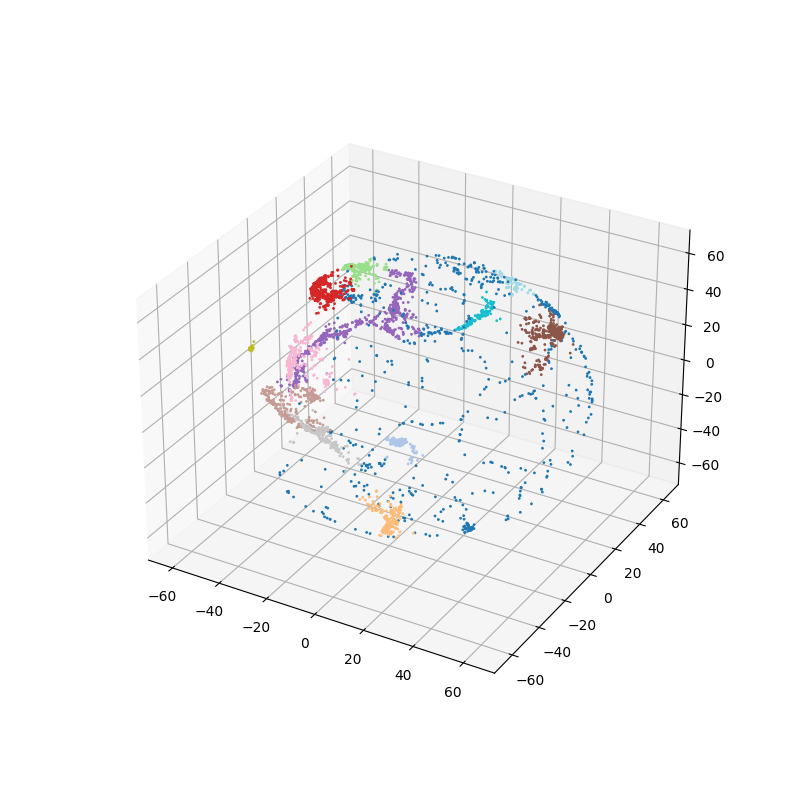

In [53]:
# Visualizing the results from DB-Scan Clustering:

fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(s_dataset['X_coordinate'], s_dataset['Y_coordinate'], s_dataset['Z_coordinate'], c = labels_db, alpha = 1, s = 1, cmap = 'tab20')
plt.show()

### Task 5: DB-Scan

- Изгответе мал заклучок зошто баш тој алгоритам го употребивте и каков е квалитетот на резултатот што сете го добиле:

### Summary on DB-Scan:

1) Make a small conclusion as to why you used that algorithm?

- The third clustering algorithm that we will implement is DB-Scan Clustering Algorithm. DB-Scan starts with a random unvisited
    starting data point. All points within a distance Epsilon are classify as neighborhood points. We need a minimum number of 
    points within the neighborhood to start the clustering process. Under such circumstances, the current data point becomes the
    first point in the cluster. Otherwise, the point gets labeled as ‘Noise.’ In either case, the current point becomes a visited
    point. All points within the distance Epsilon become part of the same cluster. Repeat the procedure for all the new points 
    added to the cluster group. Continue with the process until you visit and label each point within the Epsilon neighborhood of
    the cluster. On completion of the process, start again with a new unvisited point thereby leading to the discovery of more 
    clusters or noise. At the end of the process, you ensure that you mark each point as either cluster or noise.
    
    - Disadvantage side of Agglomerative in our case:
        It is not very effective when you have clusters of varying densities. 
        There is a variance in the setting of the distance threshold Epsilon and the minimum points for identifying the neighborhood
        when there is a change in the density levels.
        If you have high dimensional data, the determining of the distance threshold Epsilon becomes a challenging task.
    
    - Advantage side of KMeans in our case:
        The DB-Scan is better than other cluster algorithms because it does not require a pre-set number of clusters.
        It identifies outliers as noise.
        It finds arbitrarily shaped and sized clusters quite well.
        
- Finally, we will use DB-Scan clustering to see how it will perform when the number of clusters are not previously set.
    
2) What is the quality of the result that you got?

- Here the result that we manage to get are considerably worse that the previous clustering algorithms. And in this clustering results 
    we have marked points as noise.

### Final Summary:

In [2]:
# Constructing the comparison tabel for all clustering algorithms:

data = {'Metric':  ['Score', 'n_clusters'],
        'KMeans Clustering' : ['0.588', '17'],
        'Agglomerative Clustering' : ['0.577', '20'],
        'DB-Scan Clustering': ['0.459', '13'],
        }

comparison = pd.DataFrame(data, columns = ['Metric', 'KMeans Clustering', 'Agglomerative Clustering', 'DB-Scan Clustering'])

comparison

,Metric,KMeans Clustering,Agglomerative Clustering,DB-Scan Clustering
0,Score,0.588,0.577,0.459
1,n_clusters,17,20,13
